# Case study 1 superheros

In [94]:
import pandas as pd
hero = pd.read_csv('superheroes_nlp_dataset.csv')
hero.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
hero.info() # buoc tiep theo phai lam gi? -> xoa cac dong NA o history_text va power_text

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1301 non-null   object 
 2   full_name                         956 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1086 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

In [97]:
hero.dropna(subset = ['history_text'],inplace=True)
hero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1359 non-null   object 
 1   real_name                         1223 non-null   object 
 2   full_name                         907 non-null    object 
 3   overall_score                     1360 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       996 non-null    object 
 6   intelligence_score                1360 non-null   int64  
 7   strength_score                    1360 non-null   int64  
 8   speed_score                       1360 non-null   int64  
 9   durability_score                  1360 non-null   int64  
 10  power_score                       1360 non-null   int64  
 11  combat_score                      1360 non-null   int64  
 12  superp

In [98]:
#TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')  # stop_words='vietnamese'
doc_term_matrix = tfidf_vect.fit_transform(hero['history_text'].values.astype('U'))

In [104]:
#NMF non negative matrix factoring
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=3, random_state=42)

In [105]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

Top 10 words for topic #0:
['world', 'battle', 'father', 'mutants', 'peter', 'black', 'life', 'avengers', 'power', 'powers', 'hulk', 'mutant', 'later', 'team', 'time', 'men', 'earth', 'spider', 'new', 'man']


Top 10 words for topic #1:
['justice', 'league', 'damian', 'grayson', 'wonder', 'bat', 'flash', 'jason', 'crime', 'joker', 'city', 'tim', 'alfred', 'dick', 'superman', 'robin', 'gotham', 'wayne', 'bruce', 'batman']


Top 10 words for topic #2:
['misako', 'elemental', 'chen', 'mech', 'nya', 'serpentine', 'dragon', 'lord', 'realm', 'golden', 'koko', 'spinjitzu', 'zane', 'overlord', 'master', 'wu', 'ninja', 'ninjago', 'lloyd', 'garmadon']




In [106]:
topic_values = nmf.transform(doc_term_matrix)
hero['type'] = topic_values.argmax(axis=1)
hero.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,type
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [107]:
import numpy as np
conditions = [(hero['type']==0),(hero['type']==1),(hero['type']==2)]
values = ['marvel','dc','ninja']
hero['type_detail'] = np.select(conditions,values)

In [ ]:
#use Vader to score sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
st=SentimentIntensityAnalyzer()

In [108]:
compound_score = []
for i in hero['history_text']:
    analysis = st.polarity_scores(i)
    compound_score.append(analysis['compound']) 

In [109]:
hero['sentiment_score'] = compound_score
hero.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,type,type_detail,sentiment_score
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,marvel,0.0000
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,dc,-0.9687
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0,marvel,-0.6990
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,marvel,0.9943
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,dc,0.5423


In [110]:
import numpy as np
conditions = [(hero['sentiment_score']>=0.05),(hero['sentiment_score']<=-0.05),
              ((hero['sentiment_score']>-0.05) & (hero['sentiment_score']<0.05))]
values = ['positive','negative','neutral']
hero['sentiment'] = np.select(conditions, values)

<AxesSubplot:>

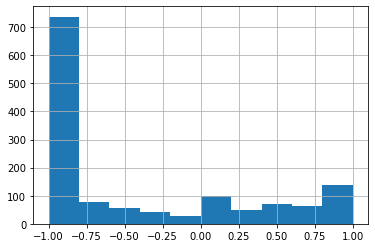

In [111]:
hero['sentiment_score'].hist()

<AxesSubplot:>

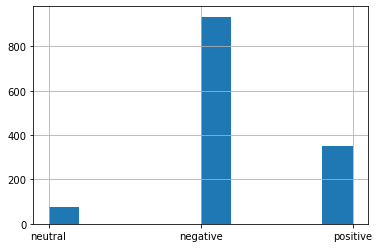

In [112]:
hero['sentiment'].hist()

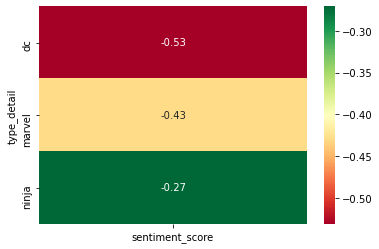

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
nscore_hero = pd.pivot_table(hero, values = 'sentiment_score', index = 'type_detail',aggfunc = np.average) #cham diem trung binh cam xuc

#plotting heat map
sns.heatmap(nscore_hero,annot = True, cmap = 'RdYlGn') #
plt.show()

In [ ]:
# phim dc comic co xu huong tieu cuc nhat -> marvel -> ninja

# Case study 2 twitter covid

In [118]:
import pandas as pd
tweet = pd.read_csv('Covid_NLP.csv',encoding='latin1')
tweet.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV..."


In [119]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(tweet['OriginalTweet'].values.astype('U'))

In [152]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, random_state=42)
nmf.fit(doc_term_matrix )

for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

Top 10 words for topic #0:
['behavior', 'retail', 'new', 'help', 'outbreak', 'crisis', 'amid', 'amp', 'impact', 'food', 'oil', 'demand', 'pandemic', 'shopping', 'online', 'prices', 'consumer', 'https', 'covid', '19']


Top 10 words for topic #1:
['essential', 'time', 'covid2019', 'working', 'stores', 'line', 'just', 'retail', 'socialdistancing', 'like', 'work', 'thank', 'coronavirus', 'covid_19', 'going', 'employees', 'people', 'workers', 'grocery', 'store']


Top 10 words for topic #2:
['buy', 'shelves', 'just', 'stock', 'amp', 'covid_19', 'need', 'buying', 'paper', 'hand', 'toilet', 'sanitizer', 'panic', 'toiletpaper', 'people', 'food', 'supermarket', 'covid19', 'https', 'coronavirus']




In [154]:
topic_values = nmf.transform(doc_term_matrix)
tweet['Topic'] = topic_values.argmax(axis=1)
tweet.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Topic,topic_detail,sentiment_score,sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2,online_shopping,0.0000,neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,0,online_shopping,0.2500,positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,0,online_shopping,0.4588,positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,2,online_shopping,0.8731,positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",2,online_shopping,0.7161,positive


In [155]:
import numpy as np
conditions = [(tweet['Topic']==0),(tweet['Topic']==1),(tweet['Topic']==2)]
values = ['online_shopping','employment','runout_good']
tweet['topic_detail'] = np.select(conditions, values)
tweet['topic_detail'].unique()

array(['runout_good', 'online_shopping', 'employment'], dtype=object)

In [156]:
#use Vader to score sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
st=SentimentIntensityAnalyzer()

In [157]:
compound_score=[]
#set function to score sentiment
for i in tweet['OriginalTweet']:
    analysis = st.polarity_scores(i)
    compound_score.append(analysis['compound'])

In [158]:
tweet['sentiment_score'] = compound_score

In [159]:
import numpy as np
conditions = [(tweet['sentiment_score']>=0.05),(tweet['sentiment_score']<=-0.05),
              ((tweet['sentiment_score']>-0.05) & (tweet['sentiment_score']<0.05))]
values = ['positive','negative','neutral']
tweet['sentiment'] = np.select(conditions, values)

<AxesSubplot:>

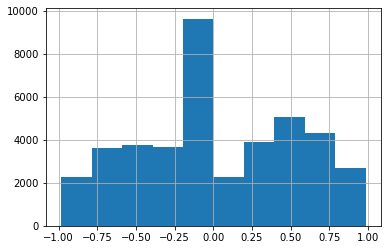

In [160]:
tweet['sentiment_score'].hist()

<AxesSubplot:>

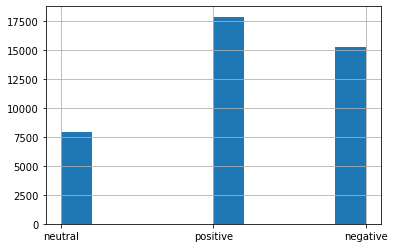

In [161]:
tweet['sentiment'].hist()

In [162]:
tweet['topic_detail'].unique()

array(['runout_good', 'online_shopping', 'employment'], dtype=object)

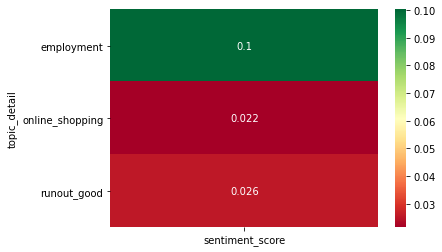

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
nscore_review =  pd.pivot_table(tweet ,values='sentiment_score', index='topic_detail',
                                           aggfunc=np.average)
#plotting heatmap
sns.heatmap(nscore_review,annot = True,cmap='RdYlGn')
plt.show()

# Case study 3 SMS

In [164]:
import pandas as pd
sms = pd.read_csv('SMS.csv',encoding='latin1')
sms.head()


,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [166]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        957 non-null    int64 
 1   Message_body  957 non-null    object
 2   Label         957 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.6+ KB


In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(sms['Message_body'].values.astype('U'))

In [169]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, random_state=42)
nmf.fit(doc_term_matrix )

for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

Top 10 words for topic #0:
['hi', 'home', 'don', 'da', 'tell', 'send', 'day', 'pls', 'got', 'like', 'know', 'good', 'come', 'oh', 'ur', 'time', 'want', 'just', 'lt', 'gt']


Top 10 words for topic #1:
['time', 'alex', 'ya', 'shopping', 'let', 'leave', 'look', 'problem', 'dun', 'dont', 'number', 'ask', 'ur', 'got', 'prob', 'wat', 'wan', 'yup', 'lor', 'ok']


Top 10 words for topic #2:
['missed', 'xxx', 'home', 'yeah', 'think', 'jus', 'mins', 'pick', 'okay', 'hair', 'uncle', 'going', 'work', 'text', 'sir', 'tonight', 'meeting', 'sorry', 'later', 'll']




In [170]:
topic_values = nmf.transform(doc_term_matrix)
sms['content'] = topic_values.argmax(axis=1)
sms.head()

,S. No.,Message_body,Label,content
0,1,Rofl. Its true to its name,Non-Spam,0
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,0
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,0
3,4,Will ü b going to esplanade fr home?,Non-Spam,0
4,5,This is the 2nd time we have tried 2 contact u...,Spam,0


In [171]:
import numpy as np
conditions = [(sms['content']==0),(sms['content']==1),(sms['content']==2)]
values = ['schedule','shopping','dating']
sms['content_detail'] = np.select(conditions, values)

In [172]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
st=SentimentIntensityAnalyzer()

In [173]:
compound_score=[]
#set function to score sentiment
for i in sms['Message_body']:
    analysis = st.polarity_scores(i)
    compound_score.append(analysis['compound'])

In [174]:
sms['sentiment_score'] = compound_score

In [175]:
import numpy as np
conditions = [(sms['sentiment_score']>=0.05),(sms['sentiment_score']<=-0.05),
              ((sms['sentiment_score']>-0.05) & (sms['sentiment_score']<0.05))]
values = ['positive','negative','neutral']
sms['sentiment'] = np.select(conditions, values)

<AxesSubplot:>

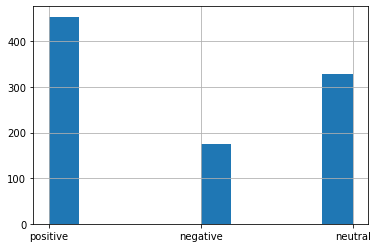

In [176]:
sms['sentiment'].hist()

<AxesSubplot:>

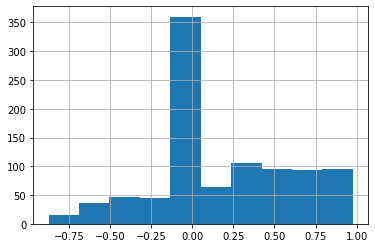

In [177]:
sms['sentiment_score'].hist()

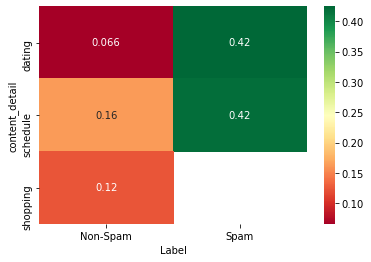

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
nscore_sms =  pd.pivot_table(sms ,values='sentiment_score', index='content_detail',
                                           columns='Label',aggfunc=np.average)
#plotting heatmap
sns.heatmap(nscore_sms,annot = True,cmap='RdYlGn')
plt.show()

In [ ]:
#Spam sms tich cuc hon kha nhieu so voi non spam sms
#dating: nguoi nhan tin co cam xuc tieu cuc nhat, spam sms cho dating thi co cam xuc tich cuc nhat
#schedule: nguoi nhan tin co cam xuc tieu cuc hon spam sms ()
#shopping: tieu cuc hon va ko co tin nhan spam nao ve shopping

In [ ]:
#Facepager #download duoc cac comment tu Facebook (chi download duoc tu cac trang fan page)